In [27]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

symbol = 'USDJPY=X'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-30 00:00:00+00:00,130.479004,131.190002,128.093002,131.179993,0,0.0,0.0
2023-02-06 00:00:00+00:00,132.009003,132.891998,129.834000,131.410004,0,0.0,0.0
2023-02-13 00:00:00+00:00,131.550995,135.080002,131.466003,134.110001,0,0.0,0.0
2023-02-20 00:00:00+00:00,134.307007,136.470001,133.929001,136.470001,0,0.0,0.0
2023-02-27 00:00:00+00:00,136.395004,137.065002,135.259995,135.839996,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-30 00:00:00+00:00,157.873001,158.059006,156.042999,157.199997,0,0.0,0.0
2025-01-06 00:00:00+00:00,157.481003,158.856995,156.274002,157.690002,0,0.0,0.0
2025-01-13 00:00:00+00:00,157.886993,158.121994,154.983002,156.270004,0,0.0,0.0


In [28]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-27 00:00:00+00:00,108.908997,109.114998,108.320000,108.320000,0,0.0,0.0
2020-02-03 00:00:00+00:00,108.380997,109.980003,108.365997,109.697998,0,0.0,0.0
2020-02-10 00:00:00+00:00,109.628998,110.121002,109.611000,109.782997,0,0.0,0.0
2020-02-17 00:00:00+00:00,109.777000,112.185997,109.655998,111.550003,0,0.0,0.0
2020-02-24 00:00:00+00:00,111.555000,111.656998,107.778000,108.136002,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-30 00:00:00+00:00,157.873001,158.059006,156.042999,157.199997,0,0.0,0.0
2025-01-06 00:00:00+00:00,157.481003,158.856995,156.274002,157.690002,0,0.0,0.0
2025-01-13 00:00:00+00:00,157.886993,158.121994,154.983002,156.270004,0,0.0,0.0


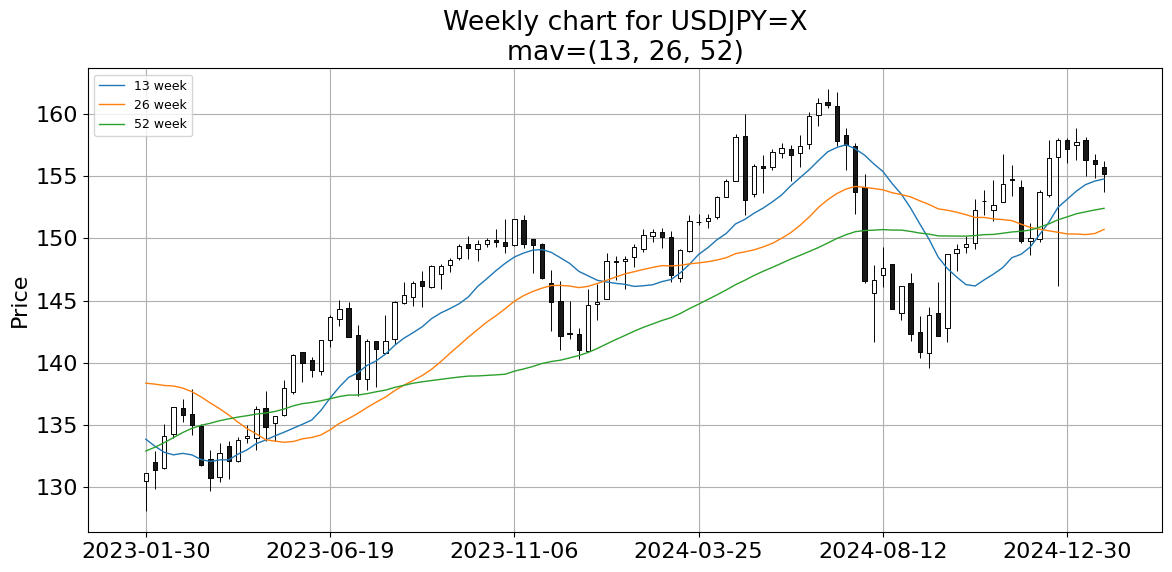

In [29]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ma13 = df0['Close'].rolling(13).mean()
ma26 = df0['Close'].rolling(26).mean()
ma52 = df0['Close'].rolling(52).mean()
apds  = [
    mpf.make_addplot(ma13[df.index], width=1, label='13 week', ax=ax),
    mpf.make_addplot(ma26[df.index], width=1, label='26 week', ax=ax),
    mpf.make_addplot(ma52[df.index], width=1, label='52 week', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%Y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s\nmav=(13, 26, 52)' % symbol)
ax.legend(loc='upper left', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_exchange.png')
plt.show()

In [30]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-27 00:00:00+00:00,155.744003,156.225998,153.725006,155.181,0,0.0,0.0


In [31]:
df.tail(2)['Close']

Date
2025-01-20 00:00:00+00:00    155.979996
2025-01-27 00:00:00+00:00    155.181000
Name: Close, dtype: float64

In [32]:
df.tail(2)['Close'].diff()

Date
2025-01-20 00:00:00+00:00         NaN
2025-01-27 00:00:00+00:00   -0.798996
Name: Close, dtype: float64

In [33]:
df['Close'].rolling(13).mean()

Date
2023-01-30 00:00:00+00:00           NaN
2023-02-06 00:00:00+00:00           NaN
2023-02-13 00:00:00+00:00           NaN
2023-02-20 00:00:00+00:00           NaN
2023-02-27 00:00:00+00:00           NaN
                                ...    
2024-12-30 00:00:00+00:00    153.126154
2025-01-06 00:00:00+00:00    153.783846
2025-01-13 00:00:00+00:00    154.303077
2025-01-20 00:00:00+00:00    154.587692
2025-01-27 00:00:00+00:00    154.754693
Name: Close, Length: 105, dtype: float64

In [34]:
df['Close'].rolling(26).mean()

Date
2023-01-30 00:00:00+00:00           NaN
2023-02-06 00:00:00+00:00           NaN
2023-02-13 00:00:00+00:00           NaN
2023-02-20 00:00:00+00:00           NaN
2023-02-27 00:00:00+00:00           NaN
                                ...    
2024-12-30 00:00:00+00:00    150.343077
2025-01-06 00:00:00+00:00    150.337692
2025-01-13 00:00:00+00:00    150.291154
2025-01-20 00:00:00+00:00    150.377693
2025-01-27 00:00:00+00:00    150.708500
Name: Close, Length: 105, dtype: float64

In [35]:
df['Close'].rolling(52).mean()

Date
2023-01-30 00:00:00+00:00           NaN
2023-02-06 00:00:00+00:00           NaN
2023-02-13 00:00:00+00:00           NaN
2023-02-20 00:00:00+00:00           NaN
2023-02-27 00:00:00+00:00           NaN
                                ...    
2024-12-30 00:00:00+00:00    151.714980
2025-01-06 00:00:00+00:00    151.961711
2025-01-13 00:00:00+00:00    152.118153
2025-01-20 00:00:00+00:00    152.268154
2025-01-27 00:00:00+00:00    152.399134
Name: Close, Length: 105, dtype: float64